In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
DATASET_PATH = 'data/4-daily-minimum-temperatures.csv'
data = pd.read_csv(DATASET_PATH)
data.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


# DatetimeIndex

In [25]:
# Casting

data['Date']                       = pd.to_datetime(data['Date'])
data['Daily minimum temperatures'] = pd.to_numeric(data['Daily minimum temperatures'], errors='coerce')

In [26]:
# Change index col

data = data.set_index('Date')
data.head()

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [27]:
# DatetimeIndex 

data['Year']         = data.index.year
data['Month']        = data.index.month
data['Weekday Name'] = data.index.day_name()
data.head()

,Daily minimum temperatures,Year,Month,Weekday Name
Date,,,,
1981-01-01,20.7,1981,1,Thursday
1981-01-02,17.9,1981,1,Friday
1981-01-03,18.8,1981,1,Saturday
1981-01-04,14.6,1981,1,Sunday
1981-01-05,15.8,1981,1,Monday


In [28]:
# Time-based Indexing

data['1981-01-01':'1981-01-5']

,Daily minimum temperatures,Year,Month,Weekday Name
Date,,,,
1981-01-01,20.7,1981,1,Thursday
1981-01-02,17.9,1981,1,Friday
1981-01-03,18.8,1981,1,Saturday
1981-01-04,14.6,1981,1,Sunday
1981-01-05,15.8,1981,1,Monday


In [29]:
# Time-based Indexing

data.loc['1981-01-01']

Daily minimum temperatures        20.7
Year                              1981
Month                                1
Weekday Name                  Thursday
Name: 1981-01-01 00:00:00, dtype: object

# Visualize time-series data

In [30]:
sns.set_theme(style="darkgrid")

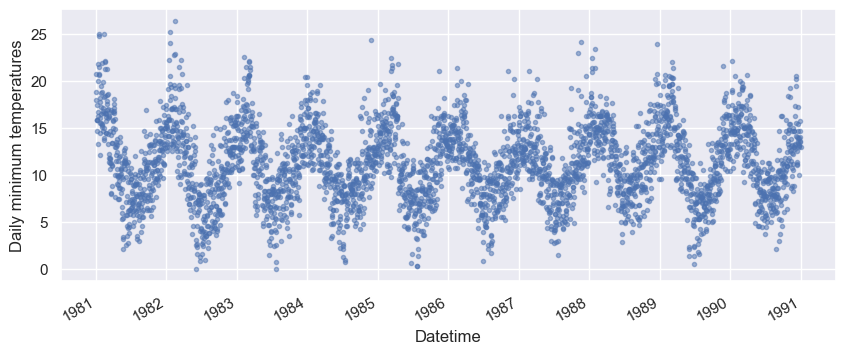

In [31]:
data['Daily minimum temperatures'].plot(
    marker='.',
    alpha=0.5,
    linestyle='None',
    figsize=(10, 4),
    subplots=True
)

plt.ylabel('Daily minimum temperatures')
plt.xlabel('Datetime')
plt.show()

## Seasonality Visualization
- **Seasonality** is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year.

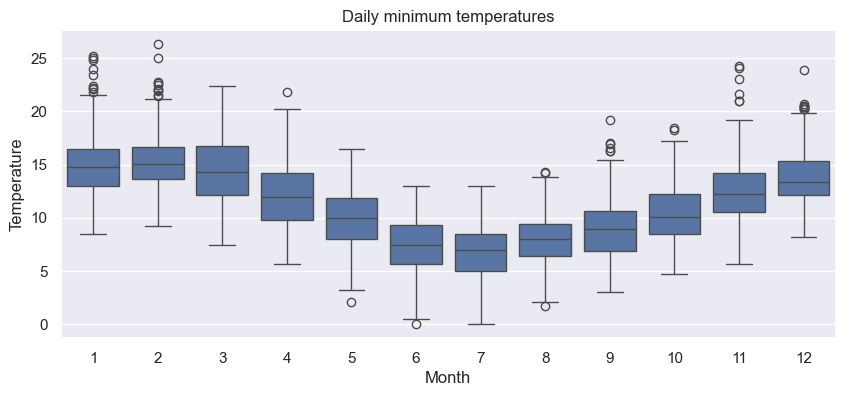

In [32]:
plt.figure(figsize=(10,4))

sns.boxplot(data, x='Month', y='Daily minimum temperatures')

plt.ylabel('Temperature')
plt.title('Daily minimum temperatures')
plt.show()

# Frequencies

In [33]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [34]:
pd.date_range('2004-09-20', periods=8, freq='h')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [35]:
# To select an arbitrary sequence of date/time values from a pandas time series, we need to use a DatetimeIndex

time_sample   = pd.to_datetime(['1981-01-01', '1981-01-04', '1981-01-8'])
consum_sample = data.loc[time_sample, ['Daily minimum temperatures']].copy()
consum_sample

,Daily minimum temperatures
1981-01-01,20.7
1981-01-04,14.6
1981-01-08,17.4


In [36]:
# Convert the data to daily frequency, without filling any missings

consum_freq = consum_sample.asfreq('D')
consum_freq

,Daily minimum temperatures
1981-01-01,20.7
1981-01-02,NaN
1981-01-03,NaN
1981-01-04,14.6
1981-01-05,NaN
1981-01-06,NaN
1981-01-07,NaN
1981-01-08,17.4


In [37]:
# Fill missings with forward filled
consum_freq['Daily minimum temperatures - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Daily minimum temperatures,Daily minimum temperatures - Forward Fill
1981-01-01,20.7,20.7
1981-01-02,NaN,20.7
1981-01-03,NaN,20.7
1981-01-04,14.6,14.6
1981-01-05,NaN,14.6
1981-01-06,NaN,14.6
1981-01-07,NaN,14.6
1981-01-08,17.4,17.4


# Resampling

In [38]:
data_resampled = data['Daily minimum temperatures'].resample('YE').mean()

df_new = data_resampled.reset_index()

df_new['Year'] = df_new['Date'].dt.year

df_new = df_new[['Year', 'Daily minimum temperatures']]
df_new.columns = ['Year', 'Average temperature']

df_new

,Year,Average temperature
0,1981,11.517260
1,1982,10.840220
2,1983,11.187397
3,1984,10.620604
4,1985,11.137534
5,1986,10.803288
6,1987,10.853151
7,1988,11.972055
8,1989,11.261918
9,1990,11.669589


In [39]:
weekly_mean = data[['Daily minimum temperatures']].resample('W').mean()
weekly_mean.head()

,Daily minimum temperatures
Date,
1981-01-04,18.000000
1981-01-11,17.542857
1981-01-18,20.371429
1981-01-25,15.771429
1981-02-01,16.657143


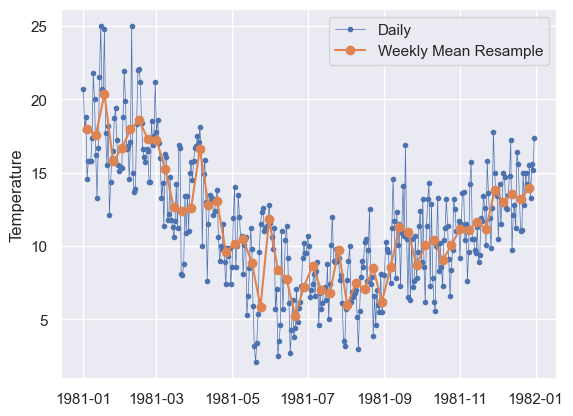

In [40]:
start, end = '1981-01', '1981-12'

_, ax = plt.subplots()

ax.plot(
    data.loc[start:end, 'Daily minimum temperatures'],
    marker='.', linestyle='-', linewidth=0.5, 
    label='Daily'
)
ax.plot(
    weekly_mean.loc[start:end, 'Daily minimum temperatures'],
    marker='o', linestyle='-',
    label='Weekly Mean Resample'
)

ax.set_ylabel('Temperature')
ax.legend()
plt.show()

In [41]:
yearly_max = data[['Daily minimum temperatures']].resample('YE').max()
yearly_max.rename(
    columns={
        'Daily minimum temperatures': 'Yearly Maximum Temperatures'
    },
    inplace=True
)
yearly_max.set_index(yearly_max.index.year, inplace=True)
yearly_max.index.name = 'Year'
yearly_max

,Yearly Maximum Temperatures
Year,
1981,25.0
1982,26.3
1983,22.5
1984,24.3
1985,22.4
1986,21.4
1987,24.1
1988,23.9
1989,22.0


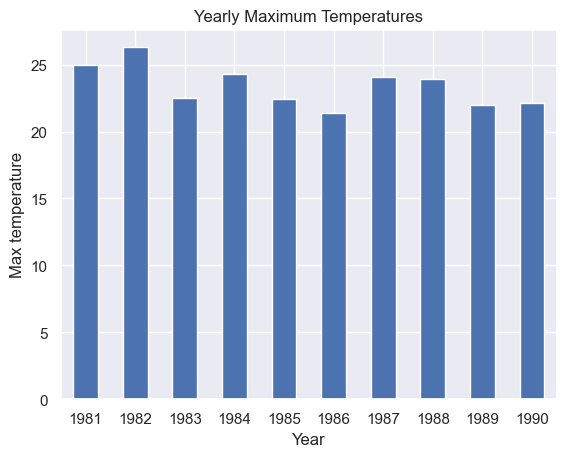

In [42]:
ax = yearly_max.loc[1981:, 'Yearly Maximum Temperatures'].plot.bar(color='C0')

ax.set_ylabel('Max temperature')
ax.set_title('Yearly Maximum Temperatures')
plt.xticks(rotation=0)
plt.show()